# Stochastic Gradient Descent

In this section, we are going to introduce the basic principles of stochastic gradient descent.

Next, we use $x=10$ as the initial value and assume $\eta=0.2$. Using gradient descent to iterate $x$ 10 times, we can see that, eventually, the value of $x$ approaches the optimal solution.

## Stochastic Gradient Descent (SGD)

In deep learning, the objective function is usually the average of the loss functions for each example in the training data set. We assume that $f_i(\boldsymbol{x})$ is the loss function of the training data instance with $n$ examples, an index of $i$, and parameter vector of $\boldsymbol{x}$, then we have the objective function

$$f(\boldsymbol{x}) = \frac{1}{n} \sum_{i = 1}^n f_i(\boldsymbol{x}).$$

The gradient of the objective function at $\boldsymbol{x}$ is computed as

$$\nabla f(\boldsymbol{x}) = \frac{1}{n} \sum_{i = 1}^n \nabla f_i(\boldsymbol{x}).$$

If gradient descent is used, the computing cost for each independent variable iteration is $\mathcal{O}(n)$, which grows linearly with $n$. Therefore, when the model training data instance is large, the cost of gradient descent for each iteration will be very high.

Stochastic gradient descent (SGD) reduces computational cost at each iteration. At each iteration of stochastic gradient descent, we uniformly sample an index $i\in{1,\ldots,n}$ for data instances at random, and compute the gradient $\nabla f_i(\boldsymbol{x})$ to update $\boldsymbol{x}$:

$$\boldsymbol{x} \leftarrow \boldsymbol{x} - \eta \nabla f_i(\boldsymbol{x}).$$

Here, $\eta$ is the learning rate. We can see that the computing cost for each iteration drops from $\mathcal{O}(n)$ of the gradient descent to the constant $\mathcal{O}(1)$. We should mention that the stochastic gradient $\nabla f_i(\boldsymbol{x})$ is the unbiased estimate of gradient $\nabla f(\boldsymbol{x})$.

$$\mathbb{E}i \nabla f_i(\boldsymbol{x}) = \frac{1}{n} \sum{i = 1}^n \nabla f_i(\boldsymbol{x}) = \nabla f(\boldsymbol{x}).$$

This means that, on average, the stochastic gradient is a good estimate of the gradient.

Now, we will compare it to gradient descent by adding random noise with a mean of 0 to the gradient to simulate a SGD.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "..")
import d2l
import numpy as np

epoch 20, x1 -0.036067, x2 0.053878


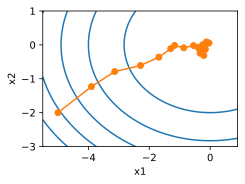

In [2]:
def f(x1, x2): return x1 ** 2 + 2 * x2 ** 2 # objective
def gradf(x1, x2): return (2 * x1, 4 * x2) # gradient
def sgd(x1, x2, s1, s2): # simulate noisy gradient
       (g1, g2) = gradf(x1, x2) # compute gradient
       (g1, g2) = (g1 + np.random.normal(0.1), g2 + np.random.normal(0.1))
       return (x1 -eta * g1, x2 -eta * g2, 0, 0) # update variables
def train_2d(trainer):
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(20):
        x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print('epoch %d, x1 %f, x2 %f' % (i + 1, x1, x2))
    return results
eta = 0.1

d2l.show_trace_2d(f, train_2d(sgd))


As we can see, the iterative trajectory of the independent variable in the SGD is more tortuous than in the gradient descent. This is due to the noise added in the experiment, which reduced the accuracy of the simulated stochastic gradient. In practice, such noise usually comes from individual examples in the training data set.

## Summary
* If we use a more suitable learning rate and update the independent variable in the opposite direction of the gradient, the value of the objective function might be reduced. Gradient descent repeats this update process until a solution that meets the requirements is obtained.
* Problems occur when the learning rate is too small or too large. A suitable learning rate is usually found only after multiple experiments.
* When there are more examples in the training data set, it costs more to compute each iteration for gradient descent, so SGD is preferred in these cases.

## Exercises
* Using a different objective function, observe the iterative trajectory of the independent variable in gradient descent and the SGD.
* In the experiment for gradient descent in two-dimensional space, try to use different learning rates to observe and analyze the experimental phenomena.